In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')

In [2]:
#Preparación de los datos
data.replace('?', np.nan, inplace=True)
data = data.astype({"age": np.float64, "fare": np.float64})

<AxesSubplot:xlabel='survived', ylabel='fare'>

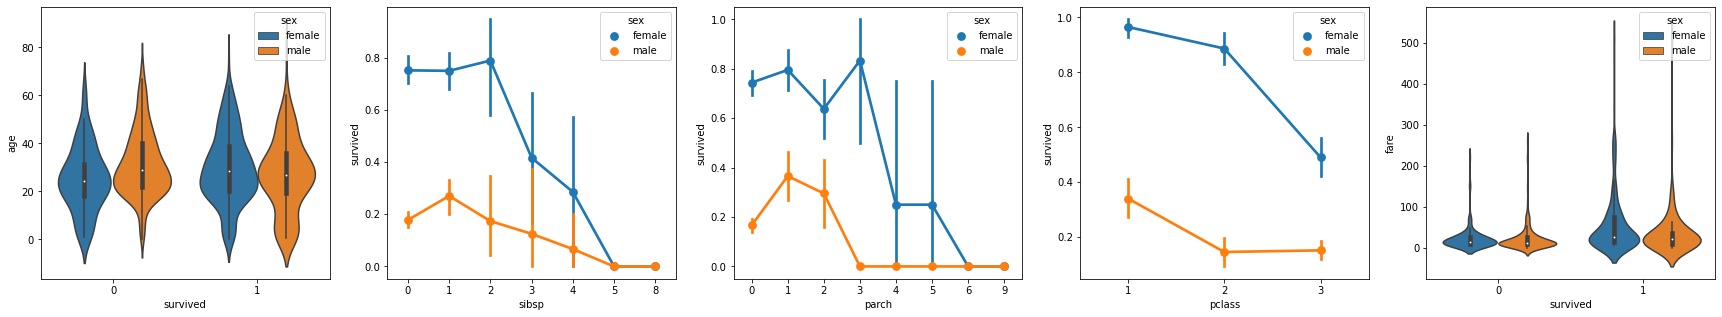

In [3]:
#Exploración de la capacidad de supervivencia con diversas variables
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [4]:
#Conversion del genero como variable numérica para poder hallar la correlación entre variables
data.replace({'female':1, 'male':0}, inplace=True)


In [5]:
#Correlación de variables con la supervivencia
data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [6]:
#Creación de característica a partir de las variables hermano o cónyugue y padres
'''
Nueva columna llamada "parientes" para ver si la combinación de ellos tiene una correlación más alta con la supervivencia
'''
data['relatives'] = data.apply(lambda x: int((x['sibsp'] + x['parch']) > 0), axis=1)


In [7]:
#Revisión de las nuevas correlaciones con el reestructurado de datos
data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [8]:
#Selección de características con correlaciones mas altas o que agregan transformación de otras variables y de filas con valores perdidos
'''
Esto se hace para estructurar un conjunto de datos con el que se pueda entrenar el modelo
'''
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()


In [9]:
#Entrenamiento y Evaluación del modelo de clasificación
'''
Los pasos a seguir serán:
1. Partición de los datos en datos de validación y datos de prueba.
2. Estandarizacion de los valores de entrada.
3. Selección y entrenamiento del modelo.
4. Prueba o evaluación del modelo.
'''

'\nLos pasos a seguir serán:\n1. Partición de los datos en datos de validación y datos de prueba.\n2. Estandarizacion de los valores de entrada.\n3. Selección y entrenamiento del modelo.\n4. Prueba o evaluación del modelo.\n'

In [10]:
#Partición de los datos
'''
Si usara todos sus datos para entrenar el modelo, no tendría una forma de estimar qué tan bien funcionaría realmente con los datos que el modelo aún no ha visto
'''
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['sex', 'pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [11]:
#Estandarizacion de los valores de entrada
'''
El objetivo es que todas las funciones sean tratadas por igual. Se asegura que los rangos de valores sean todos iguales
'''
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [12]:
#Selección y entrenamiento del modelo
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [13]:
#Prueba o evaluación del modelo
'''
Con el conjunto de datos de prueba retenido del entrenamiento, se realiza la predicción de la variable objetivo y se calcula la precisión del modelo, en este modelo entrenado la tasa de éxito de ~ 75% en la estimación de la supervivencia
'''
from sklearn import metrics

predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


**ENTRENAMIENTO DE RED NEURONAL PARA AUMENTAR LA PRECISIÓN**

- Definición del modelo.
- Agregación de capas de la red neuronal.
- Compilación del modelo.
 

In [14]:
#Importación de librerías y creación del modelo
'''
Se utiliza una red neuronal secuencial , que es una red neuronal en capas en la que hay varias capas que se alimentan entre sí en secuencia.
'''
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()


Using TensorFlow backend.


In [15]:
#Agregación de capas
'''
Por ahora, mantengamos las cosas simples y solo usemos tres capas
'''
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [16]:
#Resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Compilación del modelo
'''
Como parte de esto, debe definir qué tipo de optimizador se utilizará, cómo se calculará la pérdida y para qué métrica se debe optimizar
'''
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
836/836 [==============================] - 0s 182us/step - loss: 0.6925 - accuracy: 0.5742
Epoch 2/50
836/836 [==============================] - 0s 41us/step - loss: 0.6905 - accuracy: 0.5861
Epoch 3/50
836/836 [==============================] - 0s 40us/step - loss: 0.6876 - accuracy: 0.5861
Epoch 4/50
836/836 [==============================] - 0s 43us/step - loss: 0.6827 - accuracy: 0.5861
Epoch 5/50
836/836 [==============================] - 0s 45us/step - loss: 0.6745 - accuracy: 0.5861
Epoch 6/50
836/836 [==============================] - 0s 39us/step - loss: 0.6619 - accuracy: 0.5861
Epoch 7/50
836/836 [==============================] - 0s 46us/step - loss: 0.6444 - accuracy: 0.5861
Epoch 8/50
836/836 [==============================] - 0s 48us/step - loss: 0.6238 - accuracy: 0.6316
Epoch 9/50
836/836 [==============================] - 0s 43us/step - loss: 0.6024 - accuracy: 0.7428
Epoch 10/50
836/836 [==============================] - 0s 48us/step - loss: 0.5815 - accur

In [18]:
#Prueba o evaluación del modelo
'''
Aplicación de la red neuronal en los datos de prueba
'''
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7894736842105263


In [ ]:
Cambio 2
